<h1>LAB1</h1>
<p><strong>NAME:</strong><a href="https://github.com/wzxiong">weizhuo xiong(Link to my Github)</a></p>
<p><strong>ID:</strong>914443957</p>
<h3>Brief Self-Introduction</h3>
<p>
My name is weizhuo xiong, and I came from China. Xiong in Chinese means bear, so you will see a photo which I am saying hello to you. Although I am not a statistic student, I pretty like this subject and wish I will receive good grade too. At the same time I posted the pdf of recently learned student distribution, lol. 
</p>
<img width=400 src="http://images.rvs.com/images/3101743_bear-453765.jpg"><br>
<center>hello from me</center>
Student t distribution
\begin{equation}
f(x) = \left(\frac{1}{\sqrt{kx}} \right)\left(\frac{
\Gamma\left(\frac{1+k}{2} \right)}{\Gamma\left(\frac{k}{2} \right)}\right) \left(1+\frac{t^2}{k} \right)^ \left(-\frac{k+1}{2} \right) -\infty < t < \infty
\end{equation}

<h3>Draw UC University on Satelite Map<h3>
<h4>Purpose of Code</h4>
<p>
<ol>
<li>Represent the information graphically on a map.</li>
<ul>
<li>Draw a satellite map of California, together with state boundary, and indicate the location of theuniversities (cities where the universities are located) on the map.</li>
<li>In the same map, display the information on the relative rank (among the 9 UC campuses),
student population size and acceptance rate by making use of various aesthetic features.</li>
<li>Find and depict, on the same map, bicycle routes connecting every pair of campuses (cities).</li>
</ul>
<li>Use a graphical representation for the same data</li>
<ul>
<li>Compute driving distances between each pair of campuses (cities).</li>
<li>Use the rule that if the driving distance between a pair of campuses (cities) is at most 100 miles,then they are neighbors, i.e., there is an edge connecting those nodes.</li>
<li>Depict the graph thus constructed.</li>
<li>Use separate colors for depicting campuses depending on whether the student enrollment is less than 20,000 or greater than that.</li>
</ul>
</ol>
<h4>load package and csv file</h4>


In [1]:
options(warn=-1)
library(ggplot2)
library(ggmap)
library(maps)
UC_US_News_Ranking_2017=read.csv("C:\\Users\\xiong\\Desktop\\R\\homework3\\UC_US_News_Ranking_2017.csv")

<h4>draw satellite map with states bound line</h4>

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=California&zoom=6&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California&sensor=false


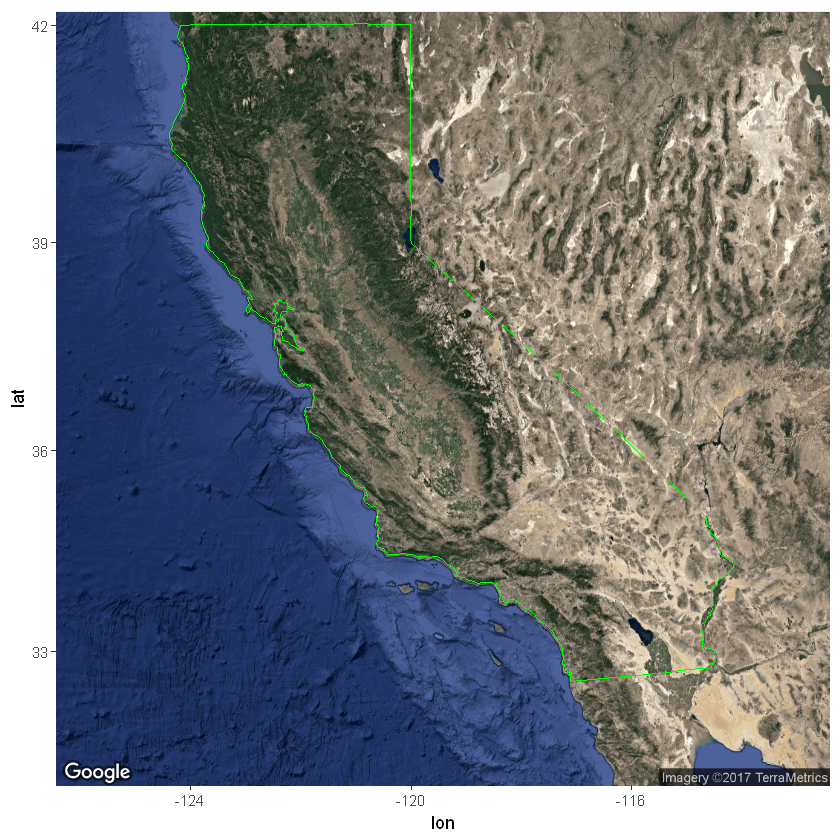

In [2]:
CA = get_map("California",zoom=6,maptype="satellite")
ggmap(CA)+ borders("state",size=0.5,col="green",xlim = c(-122.26, -117.77), ylim = c(37.77, 34.03))

<h4>long/lat information of different school</h4>

In [3]:

a=c(as.character(UC_US_News_Ranking_2017$University))
regex='UC'
a=sub(regex,'University of California,',a)
for (i in c(1:dim(UC_US_News_Ranking_2017)[1])){
  
  UC_US_News_Ranking_2017$lon[i]=geocode(a[i], output = "more",messaging = FALSE)[1]
  UC_US_News_Ranking_2017$lat[i]=geocode(a[i], output = "more",messaging = FALSE)[2]
}
UC_US_News_Ranking_2017$lon=as.numeric(UC_US_News_Ranking_2017$lon)
UC_US_News_Ranking_2017$lat=as.numeric(UC_US_News_Ranking_2017$lat)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20of%20California,%20Berkeley&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20of%20California,%20Berkeley&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20of%20California,%20Los%20Angeles%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20of%20California,%20Los%20Angeles%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20of%20California,%20Santa%20Barbara&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20of%20California,%20Santa%20Barbara&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=University%20of%20California,%20Irvine&sensor=false
Information from URL : http://maps

<h4>missing UC Riverside,correct some error caused by using geocode 
type in 3 school lon/lat by hand</h4>

In [4]:
UC_US_News_Ranking_2017$lon[8]=-117.329328
UC_US_News_Ranking_2017$lat[8]=33.97533
UC_US_News_Ranking_2017$lon[6]=-117.2340
UC_US_News_Ranking_2017$lat[6]=32.8801
UC_US_News_Ranking_2017$lon[3]=-119.8489
UC_US_News_Ranking_2017$lat[3]=34.4140
UC_US_News_Ranking_2017$lon[7]=-122.0609
UC_US_News_Ranking_2017$lat[7]=36.9914

<h4>display the information</h4>

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=California&zoom=6&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=California&sensor=false


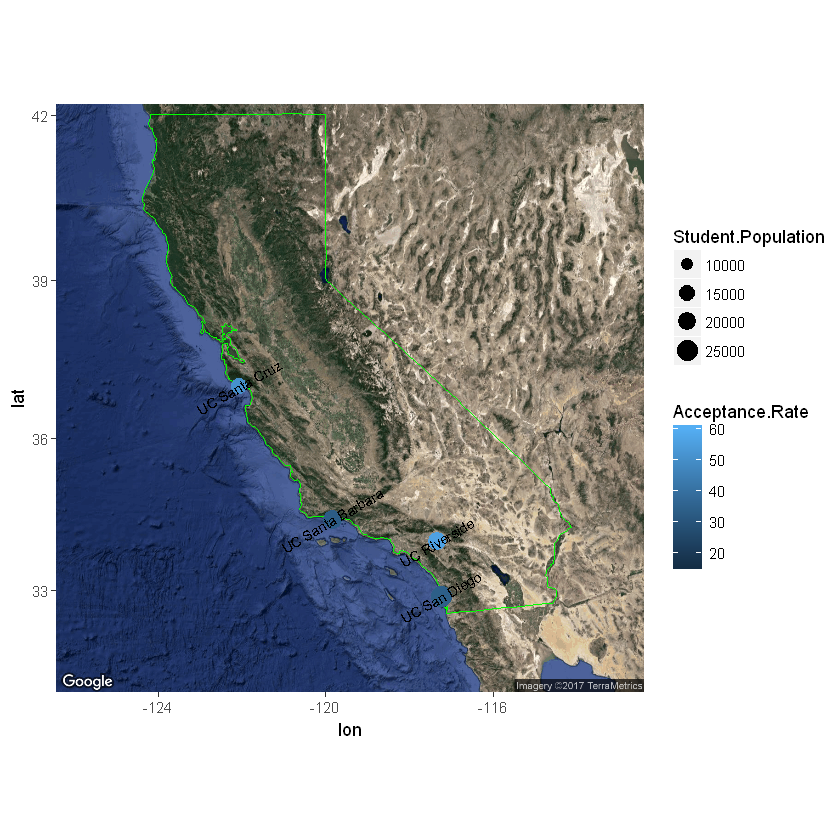

In [5]:
CA = get_map("California",zoom=6,maptype="satellite")
ggmap(CA)+ borders("state",size=0.5,col="green",xlim = c(-122.26, -117.77), ylim = c(37.77, 34.03))+
geom_point(aes(size=Student.Population,color=Acceptance.Rate),data=UC_US_News_Ranking_2017)+
geom_text(aes(label=University),data=UC_US_News_Ranking_2017,size=3,angle=30)

<h4>collect bicycle lane information</h4>

In [6]:
b=combn(a,2,simplify = TRUE)
c=route(b[1,1],b[1,2],structure = "route", mode = "bicycling")
for (i in c(2:36)){c=rbind(c,route(b[1,i],b[2,i],structure = "route", mode = "bicycling"))}
route_df=c

Information from URL : http://maps.googleapis.com/maps/api/directions/json?origin=University+of+California,+Berkeley&destination=University+of+California,+Berkeley&mode=bicycling&units=metric&alternatives=false&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/directions/json?origin=University+of+California,+Berkeley&destination=University+of+California,+Santa+Barbara&mode=bicycling&units=metric&alternatives=false&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/directions/json?origin=University+of+California,+Berkeley&destination=University+of+California,+Irvine&mode=bicycling&units=metric&alternatives=false&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/directions/json?origin=University+of+California,+Berkeley&destination=University+of+California,+Davis&mode=bicycling&units=metric&alternatives=false&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/directions/json?origin=University+of+Californ

<h4>draw bicycle lane on the previous plot</h4>

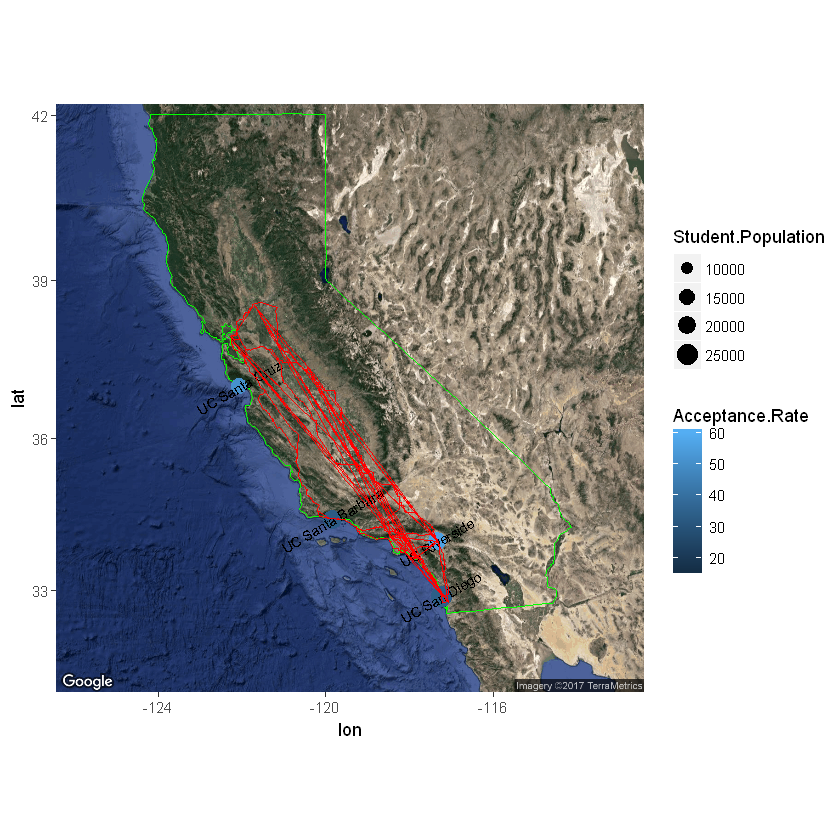

In [7]:
ggmap(CA)+ borders("state",size=0.5,col="green",xlim = c(-122.26, -117.77), ylim = c(37.77, 34.03))+
  geom_point(aes(size=Student.Population,color=Acceptance.Rate),data=UC_US_News_Ranking_2017)+
  geom_text(aes(label=University),data=UC_US_News_Ranking_2017,size=3,angle=30)+
  geom_path(colour = "red", size = 0.5,data = route_df, lineend = "round")